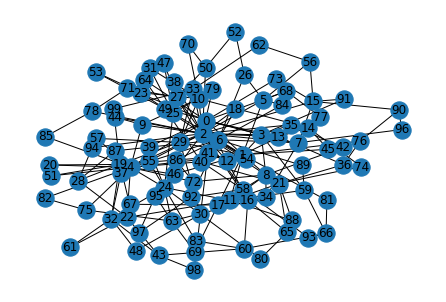

In [3]:
from ba import BAModel
bamodel=BAModel(4)
bamodel.ba_run(2,100)
bamodel.draw()

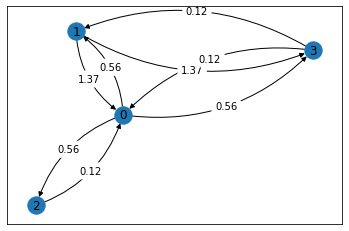

In [1]:
from grover import Grover
G=Grover([(0,1),(0,2),(0,3),(1,3)])
G.run_flowed_grover(1,([0,1.0],[1,2.0]))
G.arc_plot()

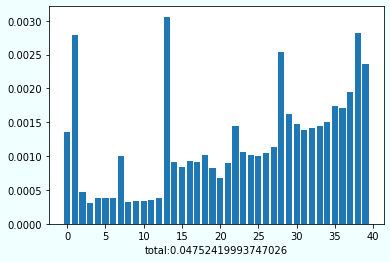

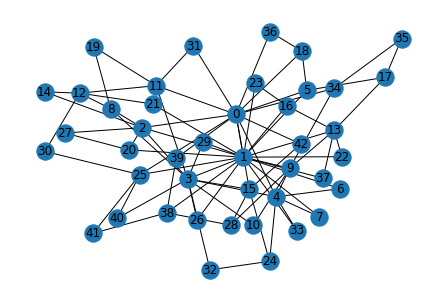

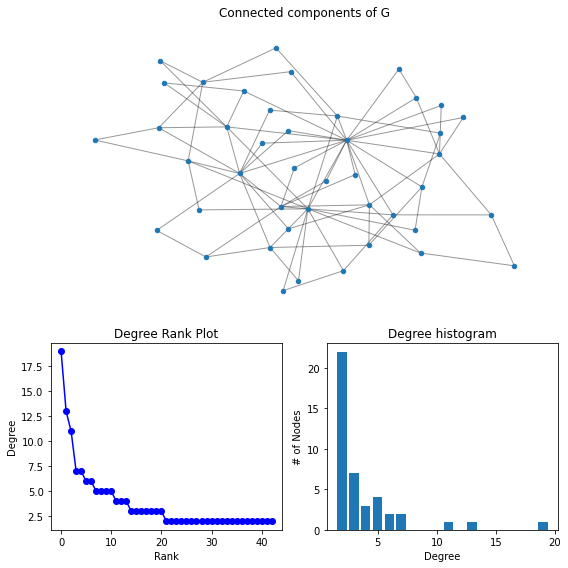

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import time
from grover import Grover
G=Grover([])
G.complete_graph(3)
times=[]
for _ in range(40):
    time_sta = time.perf_counter()
    G.run_flowed_grover(10000,[[0,3.0],[1,1.0]])
    G.qba_run(2,[[0,3.0],[1,1.0]])
    time_end = time.perf_counter()
    times.append(time_end-time_sta)
plt.figure(facecolor="azure",edgecolor="coral")
plt.xlabel("total:{}".format(sum(times)))
plt.bar([i for i,_ in enumerate (times)],times)
plt.show()
G.plot()
G.deg_plot()